**Data Collection and Preparation**

In [7]:
# Importing necessary libraries
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# UCL repository URL for the Online Retail dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"

# Load the dataset from the URL
data = pd.read_excel(url)


In [8]:
# Rename 'InvoiceDate' to 'date' for consistency
data.rename(columns={'InvoiceDate': 'date'}, inplace=True)

# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Display the first few rows of the dataset
print(data.head())

# Set the 'date' column as the index
data.set_index('date', inplace=True)

# Display the first few rows with the 'date' as index
print(data.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

                 date  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
                    InvoiceNo StockCode                          Description  \
date                                                                           
2010-12-01 08:26:00    536365

**Exploratory Data Analysis**

In [10]:

# Display summary statistics
print(data.describe())

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


**Data Cleaning**

In [11]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing CustomerID as it is crucial for customer analysis
data.dropna(subset=['CustomerID'], inplace=True)

# Fill or drop remaining missing values if necessary
data.fillna({'Description': 'No description'}, inplace=True)

# Display the first few rows after cleaning
print(data.head())


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
                    InvoiceNo StockCode                          Description  \
date                                                                           
2010-12-01 08:26:00    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER   
2010-12-01 08:26:00    536365     71053                  WHITE METAL LANTERN   
2010-12-01 08:26:00    536365    84406B       CREAM CUPID HEARTS COAT HANGER   
2010-12-01 08:26:00    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
2010-12-01 08:26:00    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.   

                     Quantity  UnitPrice  CustomerID         Country  
date                                                                  
2010-12-01 08:26:00         6       2.55     17850.0  United Kingdom  
2010-12-01 08:26:00         6       3.39     17850.0  Unite

Sales Analysis

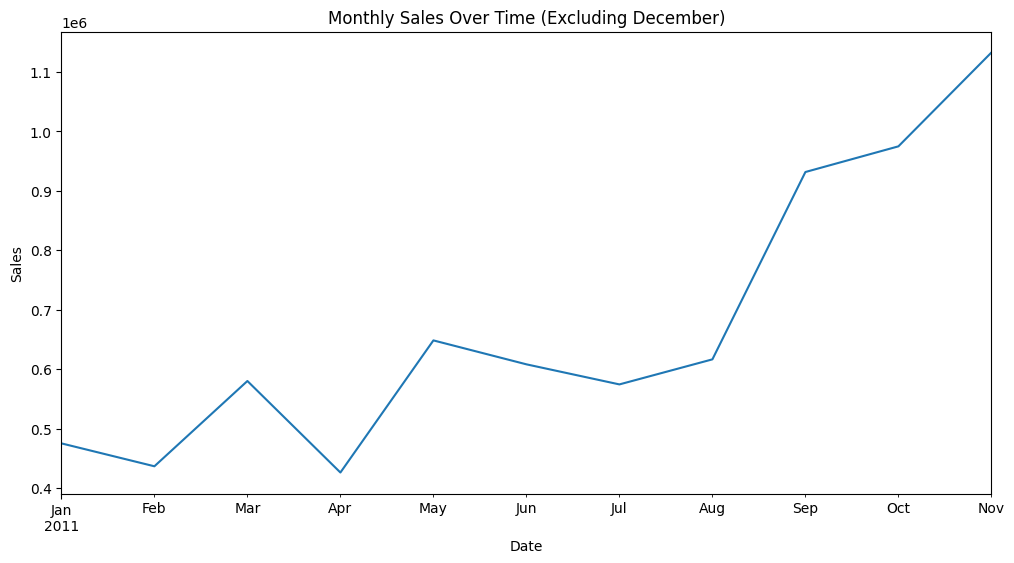

In [12]:
import matplotlib.pyplot as plt

# Create a 'Sales' column
data['Sales'] = data['Quantity'] * data['UnitPrice']

# Resample to monthly sales
monthly_sales = data['Sales'].resample('M').sum()

# Remove December from the data
monthly_sales_no_dec = monthly_sales[~monthly_sales.index.month.isin([12])]

# Plot monthly sales without December
plt.figure(figsize=(12, 6))
monthly_sales_no_dec.plot()
plt.title('Monthly Sales Over Time (Excluding December)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

 Customer Analysis

Number of unique customers: 4372
Top 10 customers by sales:
CustomerID
14646.0    279489.02
18102.0    256438.49
17450.0    187482.17
14911.0    132572.62
12415.0    123725.45
14156.0    113384.14
17511.0     88125.38
16684.0     65892.08
13694.0     62653.10
15311.0     59419.34
Name: Sales, dtype: float64


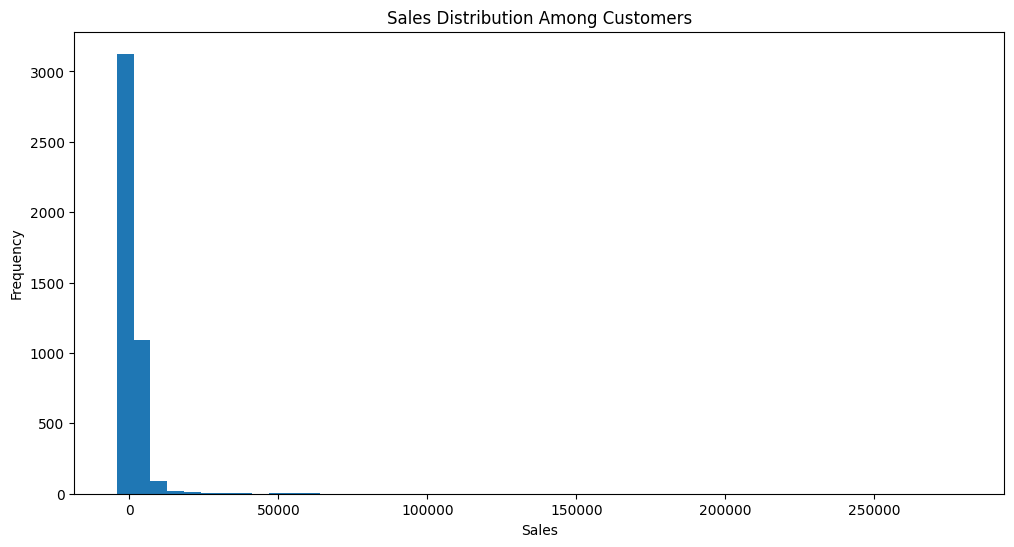

In [13]:
# Number of unique customers
num_customers = data['CustomerID'].nunique()
print(f'Number of unique customers: {num_customers}')

# Top 10 customers by sales
top_customers = data.groupby('CustomerID')['Sales'].sum().sort_values(ascending=False).head(10)
print('Top 10 customers by sales:')
print(top_customers)

# Plot sales distribution among customers
plt.figure(figsize=(12, 6))
data.groupby('CustomerID')['Sales'].sum().plot(kind='hist', bins=50)
plt.title('Sales Distribution Among Customers')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


Product Analysis

Top 10 products by sales:
Description
REGENCY CAKESTAND 3 TIER              132870.40
WHITE HANGING HEART T-LIGHT HOLDER     93823.85
JUMBO BAG RED RETROSPOT                83236.76
PARTY BUNTING                          67687.53
POSTAGE                                66710.24
ASSORTED COLOUR BIRD ORNAMENT          56499.22
RABBIT NIGHT LIGHT                     51137.80
CHILLI LIGHTS                          45936.81
PAPER CHAIN KIT 50'S CHRISTMAS         41500.48
PICNIC BASKET WICKER 60 PIECES         39619.50
Name: Sales, dtype: float64


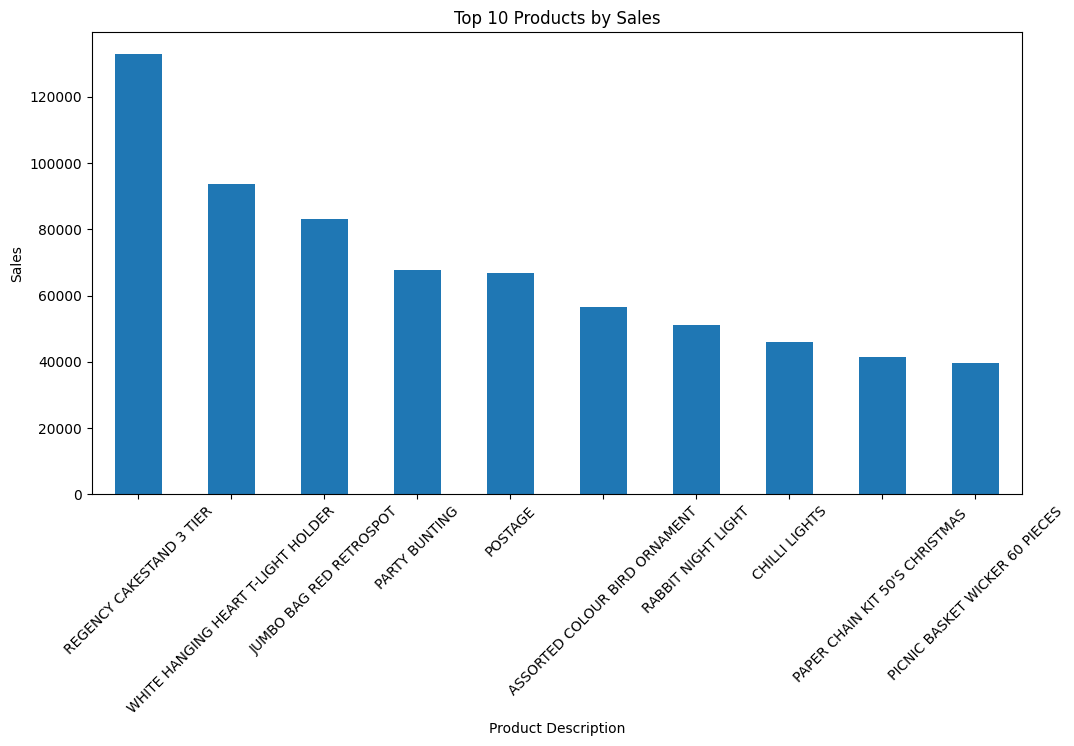

In [14]:
# Top 10 products by sales
top_products = data.groupby('Description')['Sales'].sum().sort_values(ascending=False).head(10)
print('Top 10 products by sales:')
print(top_products)

# Plot top 10 products by sales
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar')
plt.title('Top 10 Products by Sales')
plt.xlabel('Product Description')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


Data time range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00
Number of unique months: 13
Insufficient data for full seasonal decomposition. Proceeding with trend analysis.


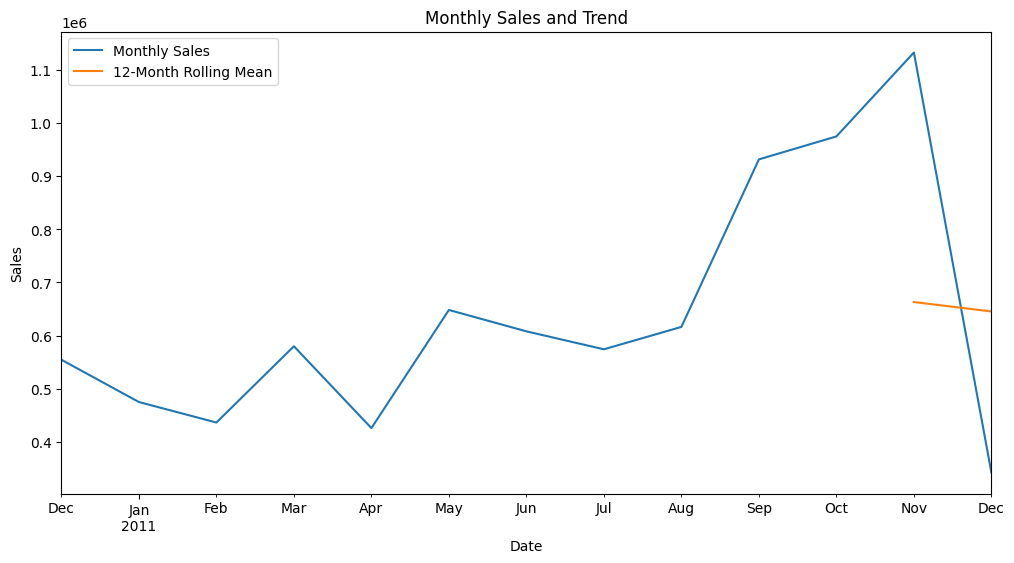

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

#Check the time range of the dataset
print(f"Data time range: {data.index.min()} to {data.index.max()}")

# Count the number of unique months
num_months = data.resample('M').size().shape[0]
print(f"Number of unique months: {num_months}")

# Create a 'Sales' column
data['Sales'] = data['Quantity'] * data['UnitPrice']

# Resample to monthly sales
monthly_sales = data['Sales'].resample('M').sum()

if num_months >= 24:
    from statsmodels.tsa.seasonal import seasonal_decompose
    # Decompose the monthly sales time series
    decomposition = seasonal_decompose(monthly_sales)
    fig = decomposition.plot()
    fig.set_size_inches(14, 10)
    plt.show()
else:
    print("Insufficient data for full seasonal decomposition. Proceeding with trend analysis.")
    # Plot monthly sales and trend
    plt.figure(figsize=(12, 6))
    monthly_sales.plot(label='Monthly Sales')
    monthly_sales.rolling(window=12).mean().plot(label='12-Month Rolling Mean')
    plt.title('Monthly Sales and Trend')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()


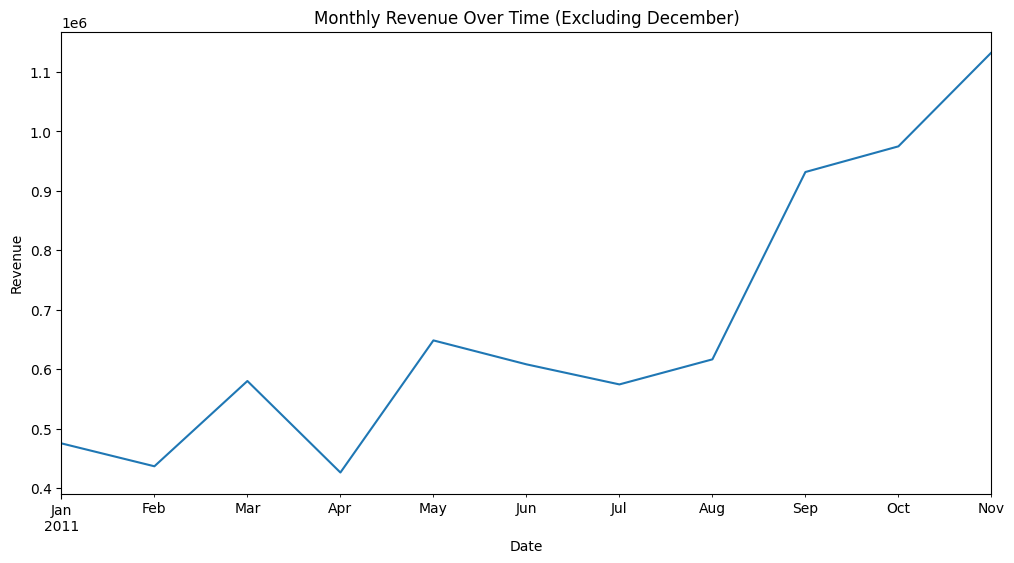

Summary Statistics:
 count    1.100000e+01
mean     6.729959e+05
std      2.348051e+05
min      4.260479e+05
25%      5.246564e+05
50%      6.080132e+05
75%      7.898457e+05
max      1.132408e+06
Name: Revenue, dtype: float64
Month with highest revenue: 2011-11-30 00:00:00
Month with lowest revenue: 2011-04-30 00:00:00


In [16]:
#Create a 'Revenue' column
data['Revenue'] = data['Quantity'] * data['UnitPrice']

# Resample to monthly revenue
monthly_revenue = data['Revenue'].resample('M').sum()

# Remove December from the data
monthly_revenue_no_dec = monthly_revenue[~monthly_revenue.index.month.isin([12])]

# Plot monthly revenue without December
plt.figure(figsize=(12, 6))
monthly_revenue_no_dec.plot()
plt.title('Monthly Revenue Over Time (Excluding December)')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

# Calculate summary statistics
summary_stats = monthly_revenue_no_dec.describe()

# Identify the month with the highest and lowest revenue
max_revenue_month = monthly_revenue_no_dec.idxmax()
min_revenue_month = monthly_revenue_no_dec.idxmin()

# Print the summary statistics and the months with highest and lowest revenue
print("Summary Statistics:\n", summary_stats)
print("Month with highest revenue:", max_revenue_month)
print("Month with lowest revenue:", min_revenue_month)

Identify best-selling products monthly

In [17]:
# Reset the index to group by month and product
data.reset_index(inplace=True)

# Extract year and month from the date for grouping
data['YearMonth'] = data['date'].dt.to_period('M')

# Group by YearMonth and Description to calculate monthly revenue for each product
monthly_product_revenue = data.groupby(['YearMonth', 'Description'])['Revenue'].sum().reset_index()

# Sort the data to have the highest revenue products at the top for each month
monthly_product_revenue = monthly_product_revenue.sort_values(['YearMonth', 'Revenue'], ascending=[True, False])


In [22]:
# Identify the best-selling product for each month
best_selling_products_monthly = monthly_product_revenue.groupby('YearMonth').first().reset_index()

# Display the best-selling products monthly
print(best_selling_products_monthly)


   YearMonth                          Description   Revenue
0    2010-12             REGENCY CAKESTAND 3 TIER  16784.10
1    2011-01   WHITE HANGING HEART T-LIGHT HOLDER  14948.50
2    2011-02             REGENCY CAKESTAND 3 TIER   9016.20
3    2011-03             REGENCY CAKESTAND 3 TIER  13256.00
4    2011-04             REGENCY CAKESTAND 3 TIER  12189.45
5    2011-05                        PARTY BUNTING  13413.20
6    2011-06       PICNIC BASKET WICKER 60 PIECES  39619.50
7    2011-07             REGENCY CAKESTAND 3 TIER  12015.45
8    2011-08              JUMBO BAG RED RETROSPOT   9690.65
9    2011-09  SET OF TEA COFFEE SUGAR TINS PANTRY   9833.02
10   2011-10                   RABBIT NIGHT LIGHT  11948.19
11   2011-11                   RABBIT NIGHT LIGHT  23134.10
12   2011-12                   RABBIT NIGHT LIGHT   6864.75


**Analyzing  Customer Purchasing Behavior Trends.**
Overall Purchasing Trends: Total revenue and number of purchases over time.

* Overall Purchasing Trends: Total revenue and number of purchases over time.
*   Customer Segmentation: Segmenting customers based on their purchasing behavior.
*  Repeat Customers: Analyzing the behavior of repeat customers versus new customers,and
*  Customer Lifetime Value (CLV): Estimating the lifetime value of customers.








Overall Purchasing Trends

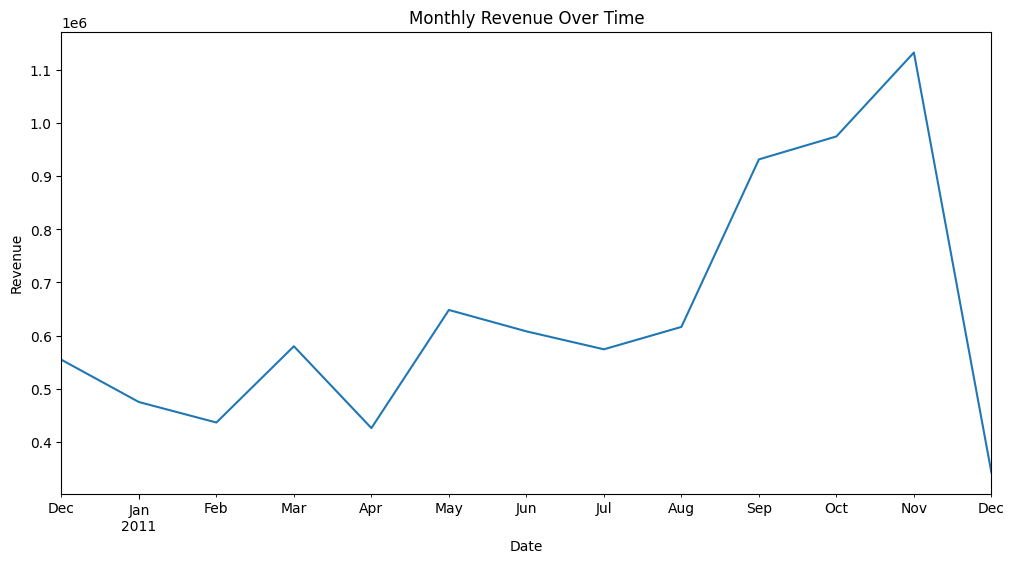

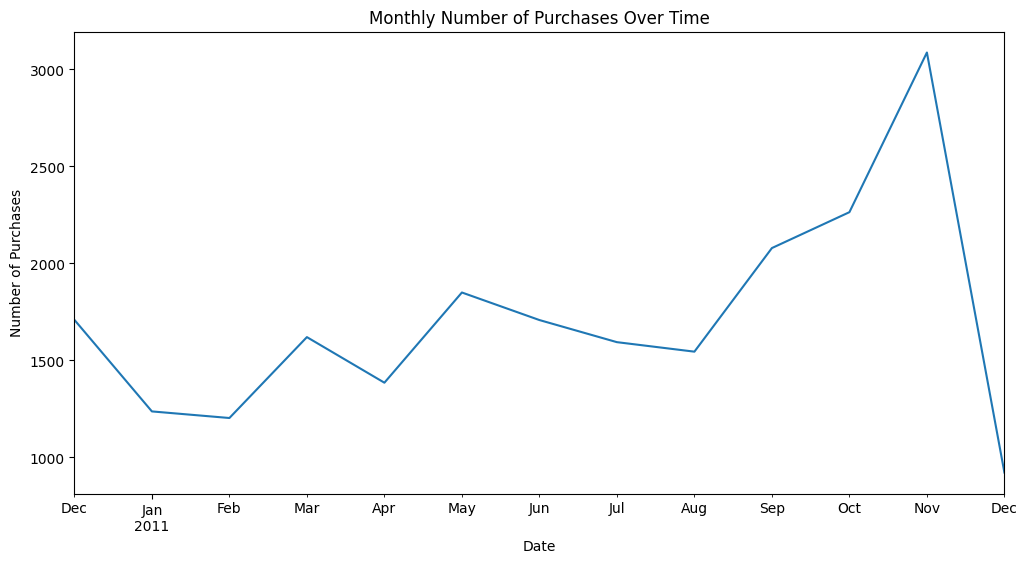

In [18]:

# Convert the 'date' column to datetime if it's not already
data['date'] = pd.to_datetime(data['date'])

# Resample to monthly revenue and number of purchases
monthly_revenue = data.resample('M', on='date')['Revenue'].sum()
monthly_purchases = data.resample('M', on='date')['InvoiceNo'].nunique()

# Plot monthly revenue
plt.figure(figsize=(12, 6))
monthly_revenue.plot()
plt.title('Monthly Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

# Plot monthly number of purchases
plt.figure(figsize=(12, 6))
monthly_purchases.plot()
plt.title('Monthly Number of Purchases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Purchases')
plt.show()


 Customer Segmentation:Segmenting customers based on their purchasing behavior

In [19]:
# Aggregate data by customer
customer_data = data.groupby('CustomerID').agg({
    'Revenue': 'sum',
    'InvoiceNo': 'nunique',
    'date': ['min', 'max']
}).reset_index()

# Flatten multi-level columns
customer_data.columns = ['CustomerID', 'TotalRevenue', 'TotalPurchases', 'FirstPurchaseDate', 'LastPurchaseDate']

# Calculate recency, frequency, and monetary value (RFM)
customer_data['Recency'] = (data['date'].max() - customer_data['LastPurchaseDate']).dt.days
customer_data['Frequency'] = customer_data['TotalPurchases']
customer_data['MonetaryValue'] = customer_data['TotalRevenue']

# Display customer segments
print(customer_data.head())


   CustomerID  TotalRevenue  TotalPurchases   FirstPurchaseDate  \
0     12346.0          0.00               2 2011-01-18 10:01:00   
1     12347.0       4310.00               7 2010-12-07 14:57:00   
2     12348.0       1797.24               4 2010-12-16 19:09:00   
3     12349.0       1757.55               1 2011-11-21 09:51:00   
4     12350.0        334.40               1 2011-02-02 16:01:00   

     LastPurchaseDate  Recency  Frequency  MonetaryValue  
0 2011-01-18 10:17:00      325          2           0.00  
1 2011-12-07 15:52:00        1          7        4310.00  
2 2011-09-25 13:13:00       74          4        1797.24  
3 2011-11-21 09:51:00       18          1        1757.55  
4 2011-02-02 16:01:00      309          1         334.40  


Repeat Customers

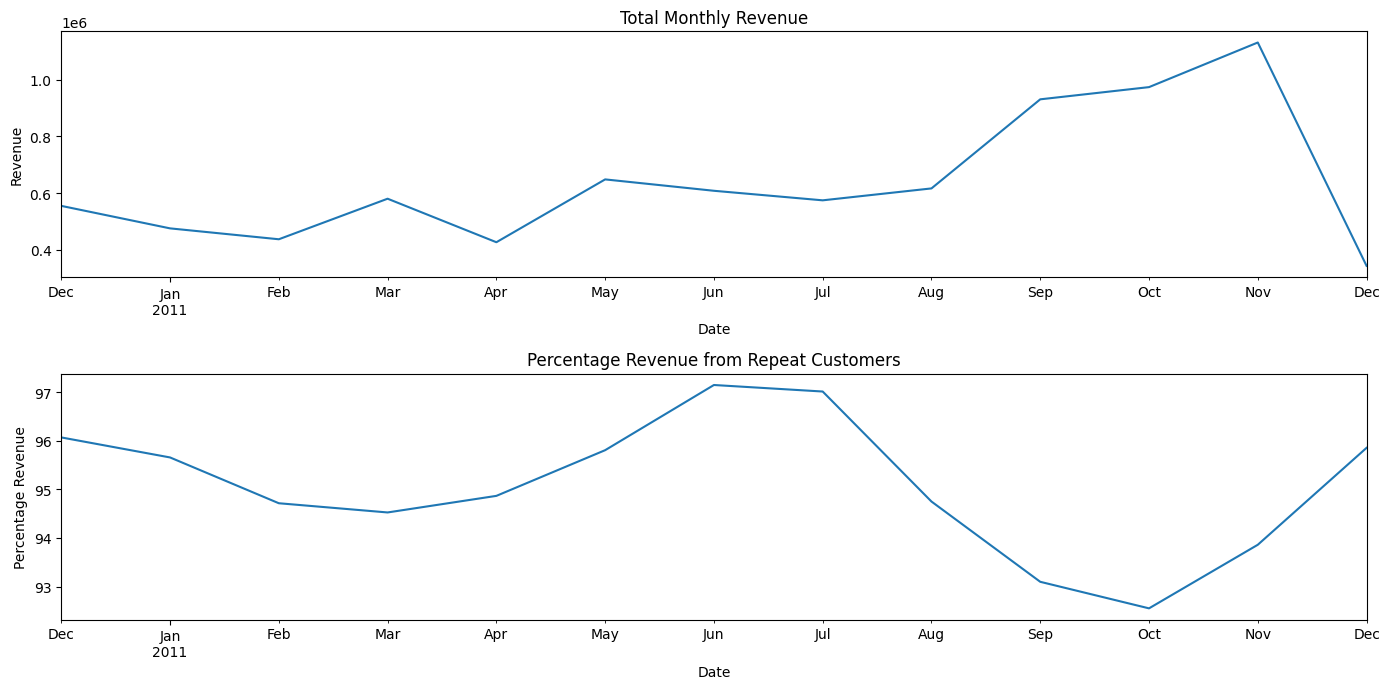

In [22]:
# Identify repeat customers
repeat_customers = customer_data[customer_data['Frequency'] > 1]


#Create a 'Revenue' column
data['Revenue'] = data['Quantity'] * data['UnitPrice']

# Monthly revenue from repeat customers
monthly_repeat_revenue = data[data['CustomerID'].isin(repeat_customers['CustomerID'])].resample('M', on='date')['Revenue'].sum()

# Reset index for further processing
data.reset_index(inplace=True)

# Aggregate data by customer
customer_data = data.groupby('CustomerID').agg({
    'Revenue': 'sum',
    'InvoiceNo': 'nunique',
    'date': ['min', 'max']
}).reset_index()

# Flatten multi-level columns
customer_data.columns = ['CustomerID', 'TotalRevenue', 'TotalPurchases', 'FirstPurchaseDate', 'LastPurchaseDate']

# Calculate recency, frequency, and monetary value (RFM)
customer_data['Recency'] = (data['date'].max() - customer_data['LastPurchaseDate']).dt.days
customer_data['Frequency'] = customer_data['TotalPurchases']
customer_data['MonetaryValue'] = customer_data['TotalRevenue']

# Identify repeat customers
repeat_customers = customer_data[customer_data['Frequency'] > 1]

# List of repeat customer IDs
repeat_customer_ids = repeat_customers['CustomerID']

# Monthly revenue for all customers
monthly_revenue_all = data.resample('M', on='date')['Revenue'].sum()

# Monthly revenue for repeat customers
monthly_revenue_repeat = data[data['CustomerID'].isin(repeat_customer_ids)].resample('M', on='date')['Revenue'].sum()

# Calculate the percentage of revenue from repeat customers
percentage_revenue_repeat = (monthly_revenue_repeat / monthly_revenue_all) * 100

# Plot monthly revenue and percentage revenue from repeat customers
plt.figure(figsize=(14, 7))

# Plot total monthly revenue
plt.subplot(2, 1, 1)
monthly_revenue_all.plot()
plt.title('Total Monthly Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')

# Plot percentage revenue from repeat customers
plt.subplot(2, 1, 2)
percentage_revenue_repeat.plot()
plt.title('Percentage Revenue from Repeat Customers')
plt.xlabel('Date')
plt.ylabel('Percentage Revenue')

plt.tight_layout()
plt.show()

Customer Lifetime Value (CLV)

In [21]:
# Calculate CLV
customer_data['CLV'] = customer_data['MonetaryValue'] * customer_data['Frequency']

# Display top customers by CLV
top_customers_clv = customer_data.sort_values(by='CLV', ascending=False).head(10)
print(top_customers_clv[['CustomerID', 'CLV']])


      CustomerID          CLV
1895     14911.0  32878009.76
1703     14646.0  21520654.54
4233     18102.0  15899186.38
3758     17450.0  10311519.35
1345     14156.0   7483353.24
2192     15311.0   7011482.12
4042     17841.0   6817591.82
568      13089.0   6771533.84
330      12748.0   6512150.40
3801     17511.0   4053767.48
